# Random Forest Regressor
RandomForestRegressor is a machine learning algorithm used of regression task. It is an ensemble learning method that works by building multiple decision trees and combining their outputs to make predictions. Each tree is a forest is constructed using a random subset of the training data and a random subset of the features, which helps to reduce overfitting and increase the generalization ability of the model.
During the training process, the Random Forest Algorithm constructs a number of decision trees using bootstram sampling and random feature selection. Each tree is trained on a different s subsect of the data, and the final predcition is obtaine by averaging the predictions of all the trees.
RandomForestRegressor is apopular algorithem for regression taks because it can handle high-dimensional data, non-linear relationships between the features and the target variables and noisy data. It is also relatively easy to use and has good performance in many real-world applications. However, it may not be the best choice for all regression tasks,and it is important to evaluate its performance on the specific problem at hand.

# Predicting the Real Estate Median Price

In [10]:
#importing the library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [3]:
#loading the dataset
df=pd.read_csv('/kaggle/input/real-estate-dataset/data.csv')
#showing the dataset
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


# Getting the Preliminary Information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


# Checking for Missing Values

In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Getting the Descriptive Statistics

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


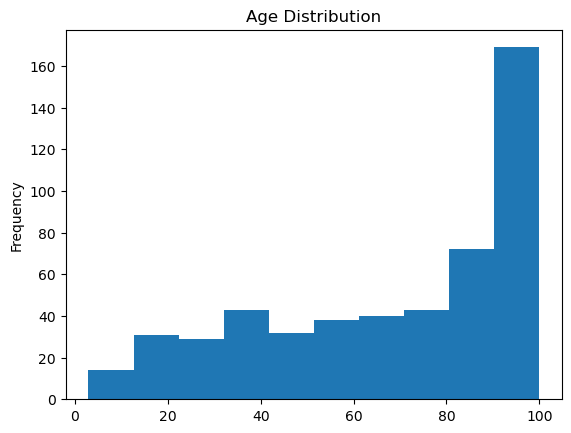

In [12]:
df['AGE'].plot(kind='hist',bins=10)
plt.title("Age Distribution")


plt.show()

# Checking the Correlation between the features

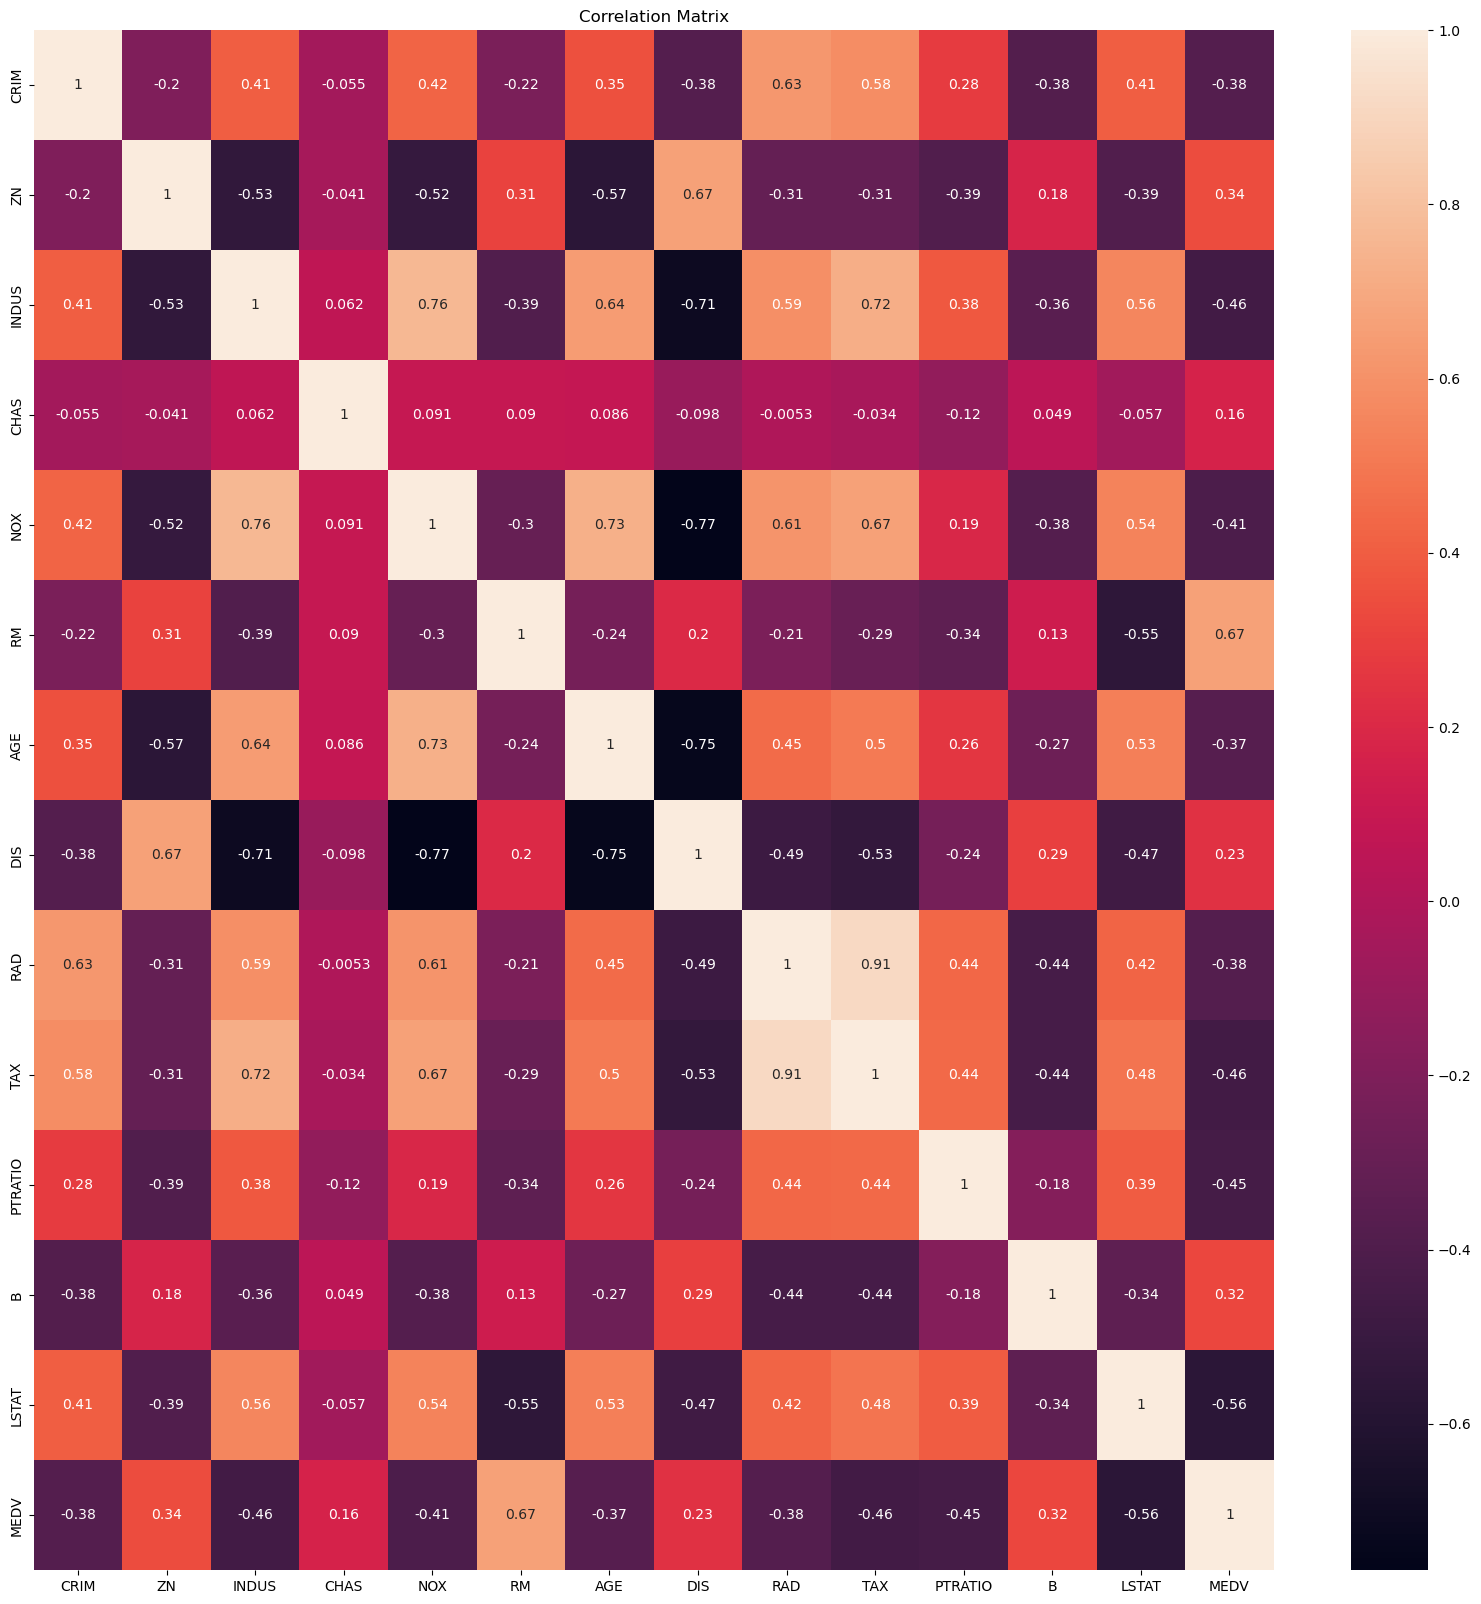

In [17]:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix')
plt.show()

# Creating the Scatter plot

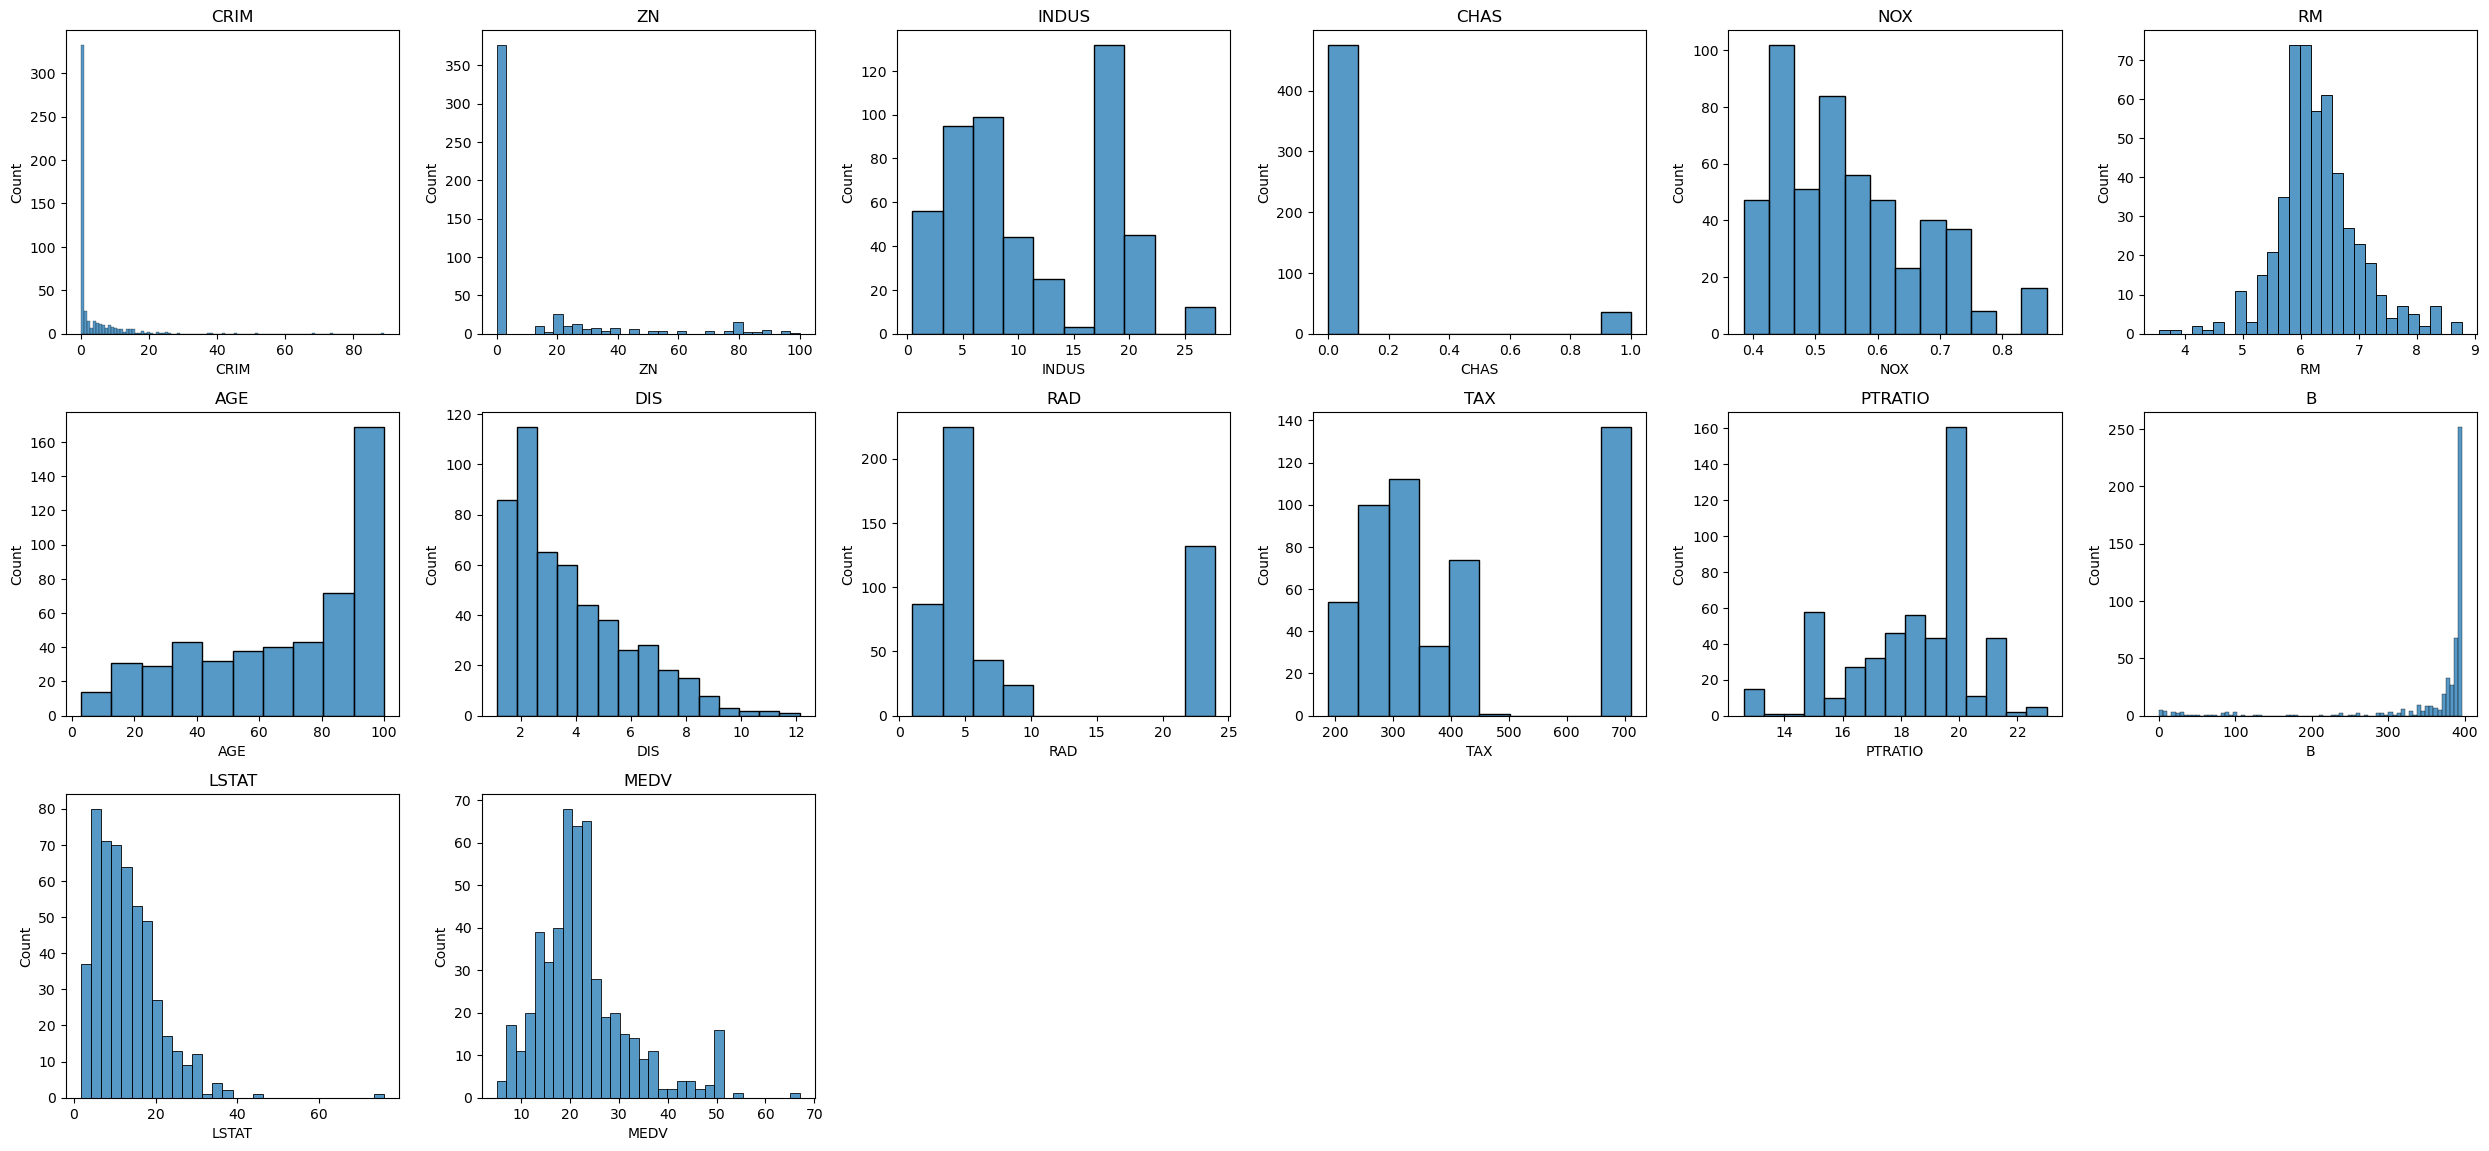

In [21]:
plt.figure(figsize=(25,15))
#looping throug the columns
for i, column in enumerate(df.columns):
    plt.subplot(4,6,i+1)
    sns.histplot(data=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

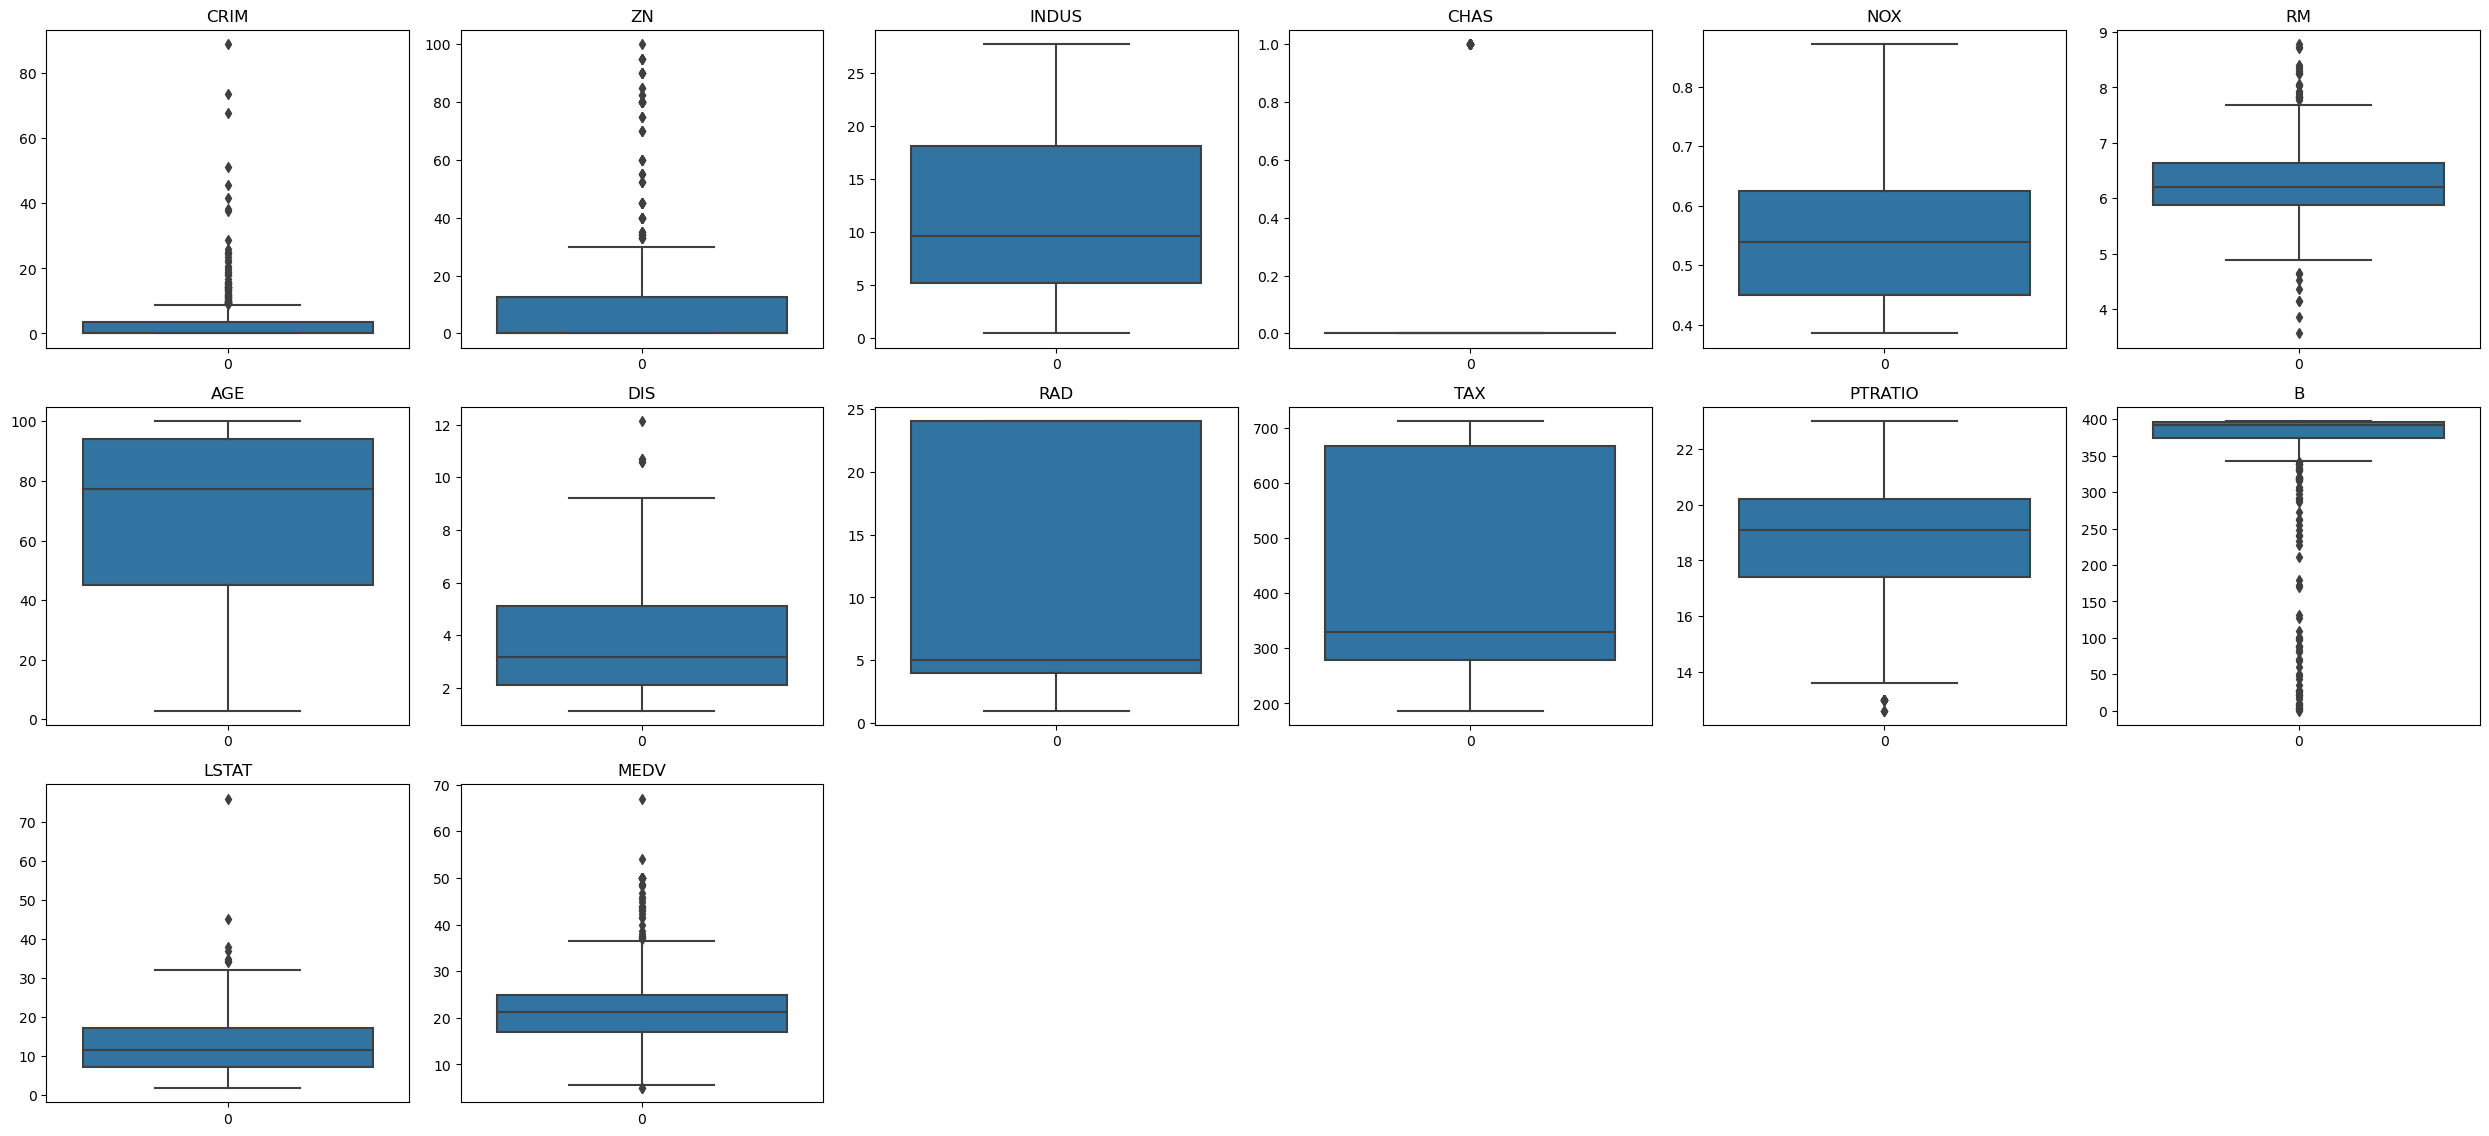

In [23]:
plt.figure(figsize=(25,15))
#looping throug the columns
for i, column in enumerate(df.columns):
    plt.subplot(4,6,i+1)
    sns.boxplot(data=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Preprocessing Function

In [35]:
def preprocess_input(df):
    df=df.copy()
    #filling missing value
    
    df['RM']=df['RM'].fillna(df['RM'].mean())
    
    y=-df['MEDV']
    x=df.drop('MEDV',axis=1)
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    
    
    return x_train,x_test,y_train,y_test

In [36]:
x_train,x_test,y_train,y_test=preprocess_input(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(357, 13)
(154, 13)
(357,)
(154,)


# Training the Model

In [37]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.8090475319497449


# Root Mean Square Error

In [38]:
y_pred=model.predict(x_test)
root_mean_square_error=np.sqrt(np.sum((y_pred-y_test)**2))
print(root_mean_square_error)

47.607540705228615


# Plotting between Predicted and Real Values

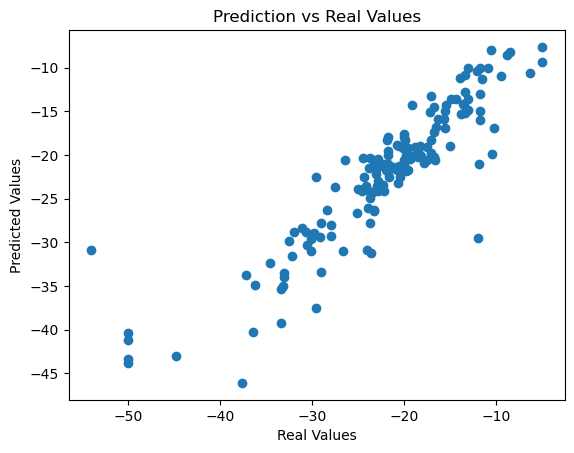

In [40]:
plt.scatter(x=y_test,y=y_pred)
plt.title('Prediction vs Real Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()